<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Adv%20Spvsd%20Algo%20-%20Time%20Series%20Forecast%20%26%20RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

# **Time Series Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 39.4MB/s]


In [38]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [4]:
mobile_sales.shape

(217, 2)

In [6]:
mobile_sales.describe(include = "all")

<ipython-input-6-3e7a40ea080d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.describe(include = "all")


,DATE,Sales
count,217,198.000000
unique,217,NaN
top,2001-01-01 00:00:00,NaN
freq,1,NaN
first,2001-01-01 00:00:00,NaN
last,2019-01-01 00:00:00,NaN
mean,NaN,10842.757576
std,NaN,2605.006293
min,NaN,108.000000
25%,NaN,8856.000000


In [7]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [39]:
mobile_sales.set_index('DATE', inplace=True)

In [9]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


<Axes: xlabel='DATE'>

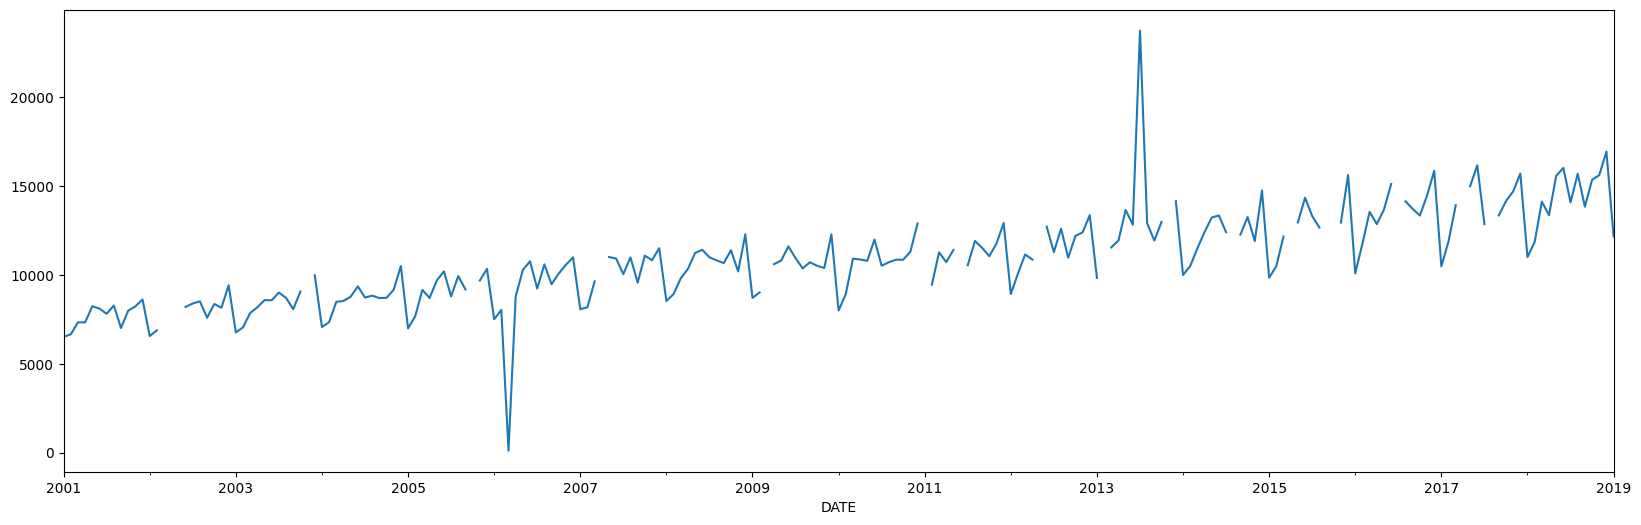

In [10]:
mobile_sales['Sales'].plot()

In [28]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

## Treating Missing Values

In [ ]:
mobile_sales['Sales'].mean()
10842.757575757576

### Mean Imputation - NG

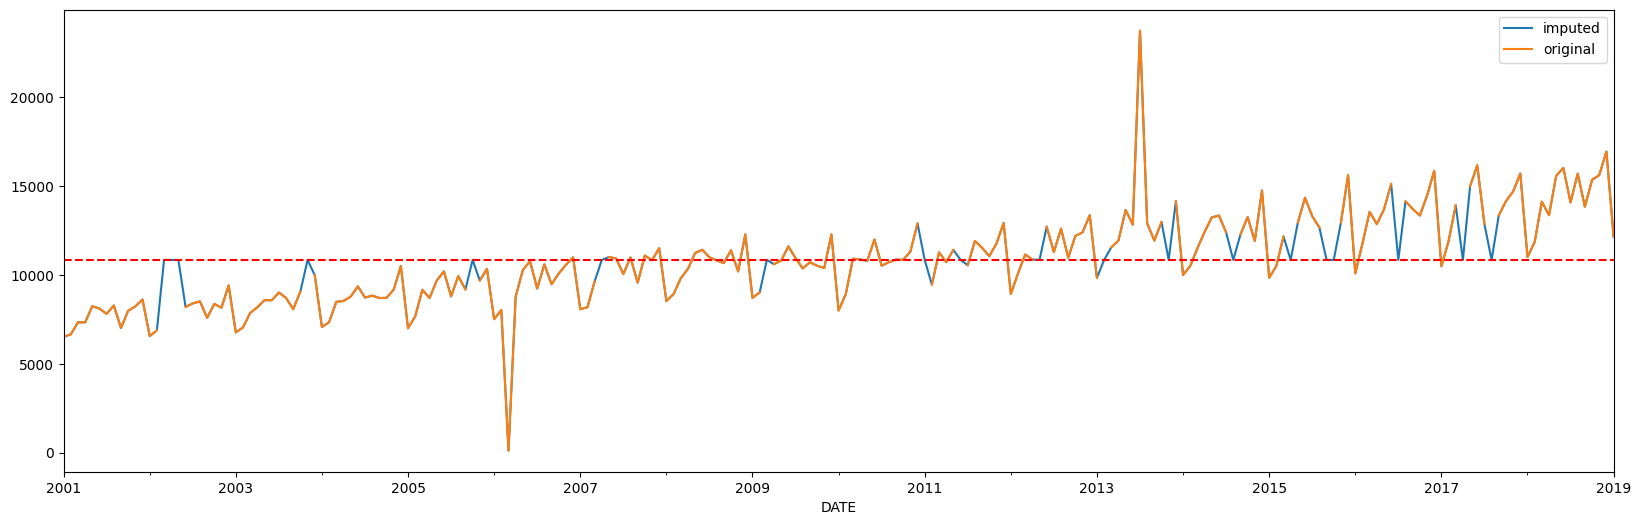

In [14]:
mobile_sales.Sales.fillna( mobile_sales.Sales.mean() ).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.axhline(y = mobile_sales['Sales'].mean(), color = 'r', linestyle = '--')
plt.legend()

### Forward Fill - OK

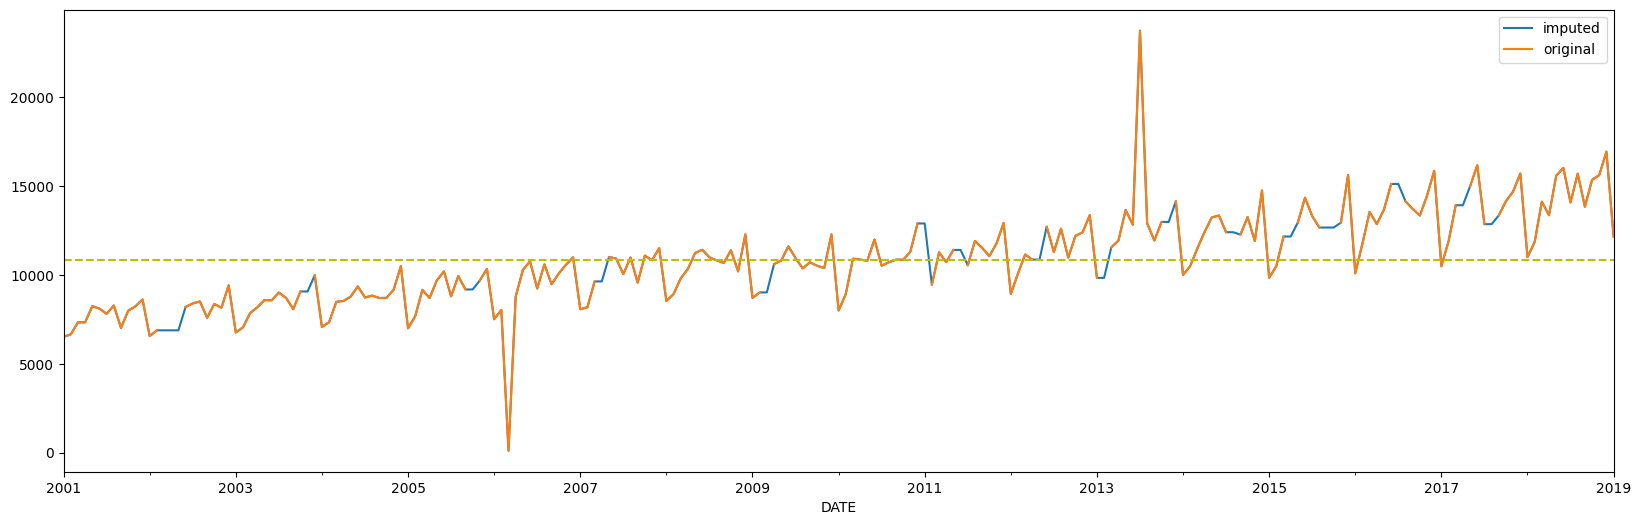

In [17]:
mobile_sales.Sales.fillna( method='ffill').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.axhline(y = mobile_sales['Sales'].mean(), color = 'y', linestyle = '--')
plt.legend()

### Linear Interpolation - OK

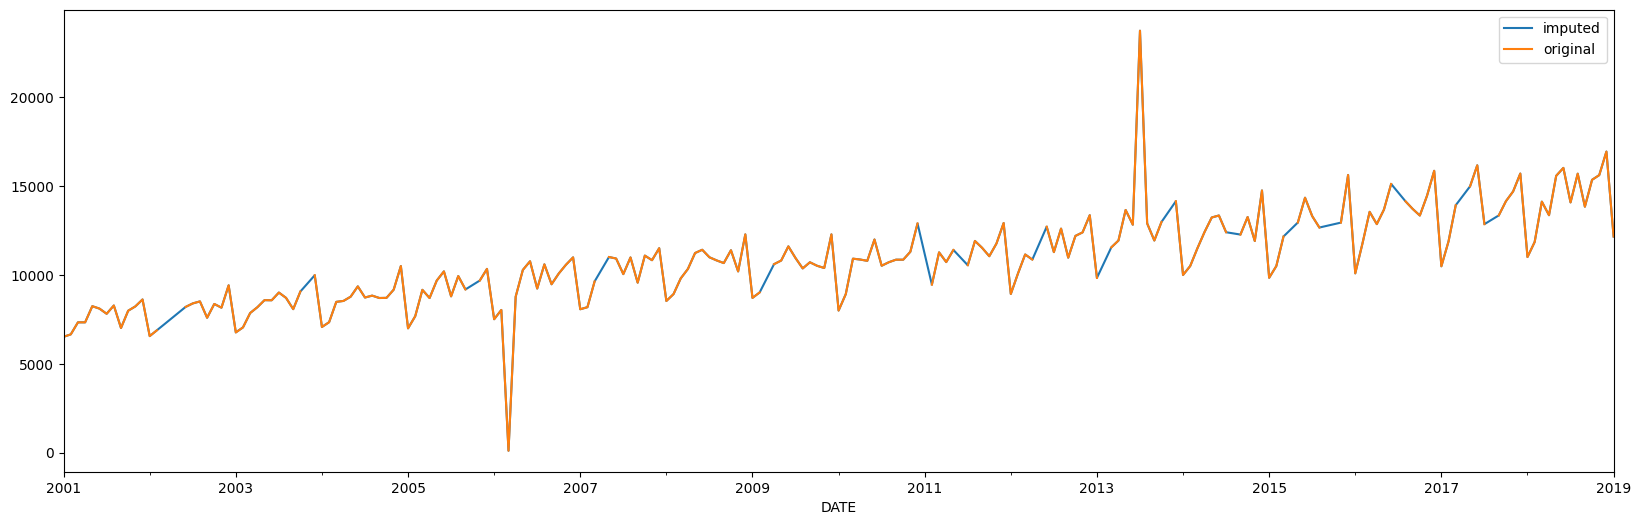

In [18]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [40]:
mobile_sales['Sales'] = mobile_sales.Sales.interpolate(method='linear')

In [41]:
mobile_sales.isna().sum()

Sales    0
dtype: int64

## Treating Anamolies

[]

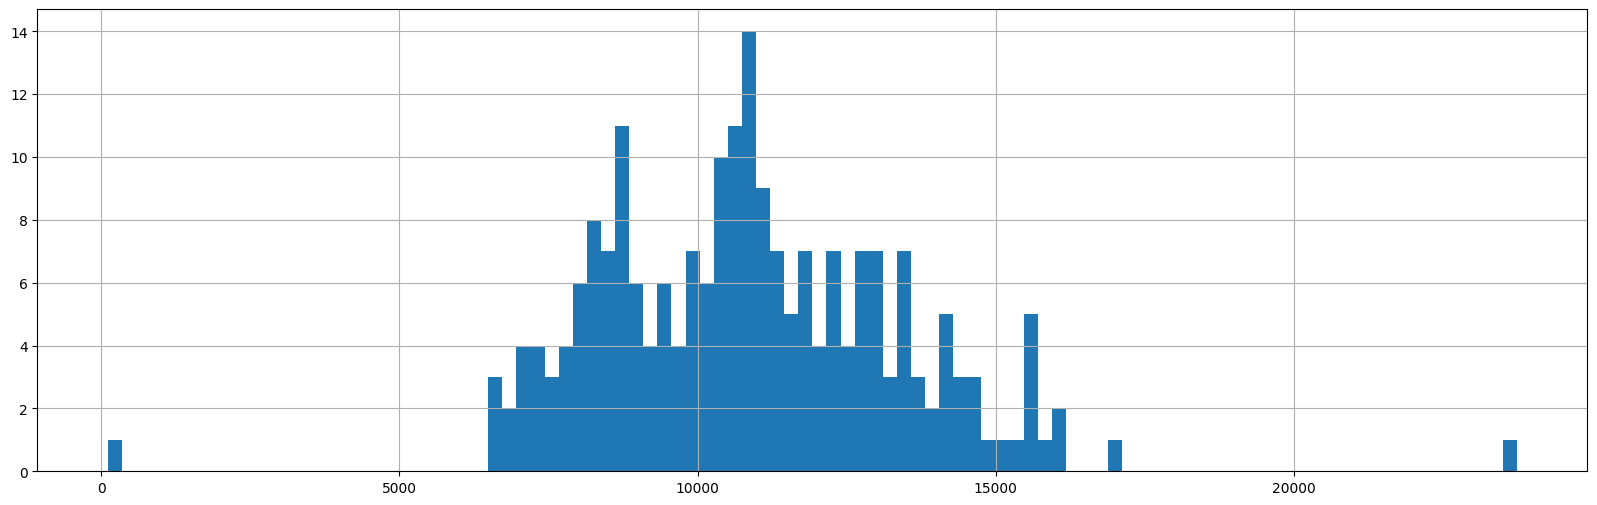

In [42]:
mobile_sales.Sales.hist(bins = 100).plot()

### Clipping - OK

In [32]:
mobile_sales.Sales.quantile(0.995)

16879.15999999999

In [33]:
mobile_sales.Sales.quantile(0.005)

6522.12

[]

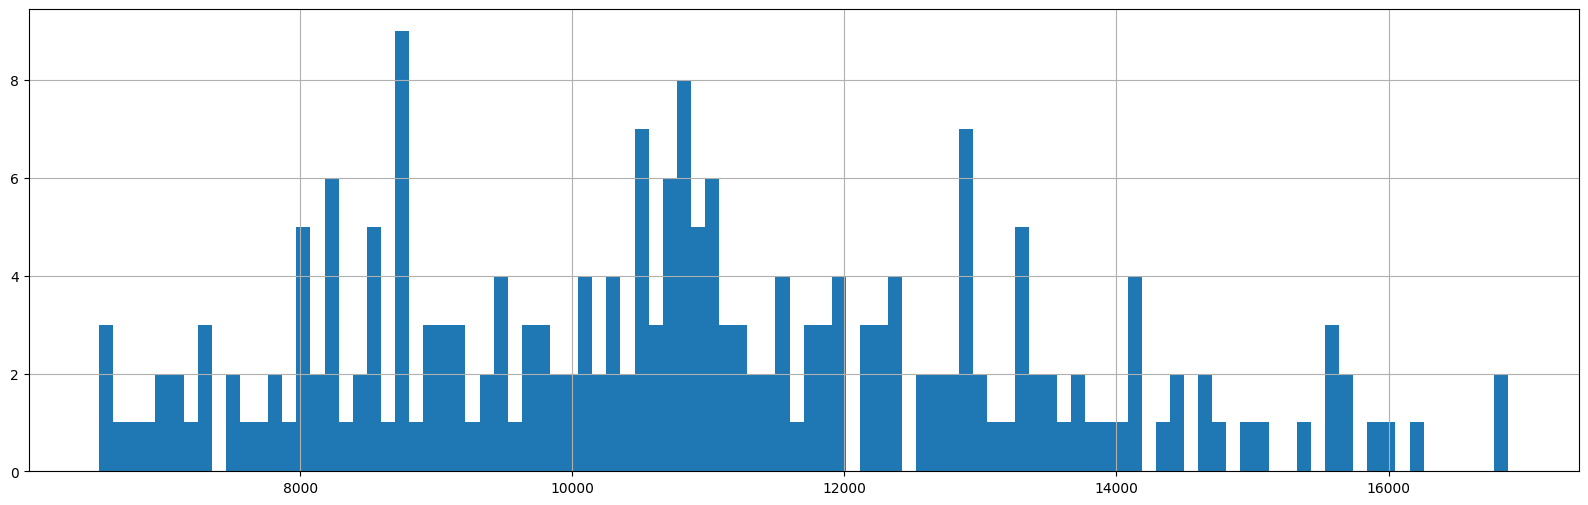

In [43]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.995), lower=mobile_sales.Sales.quantile(0.005)).hist(bins=100).plot()

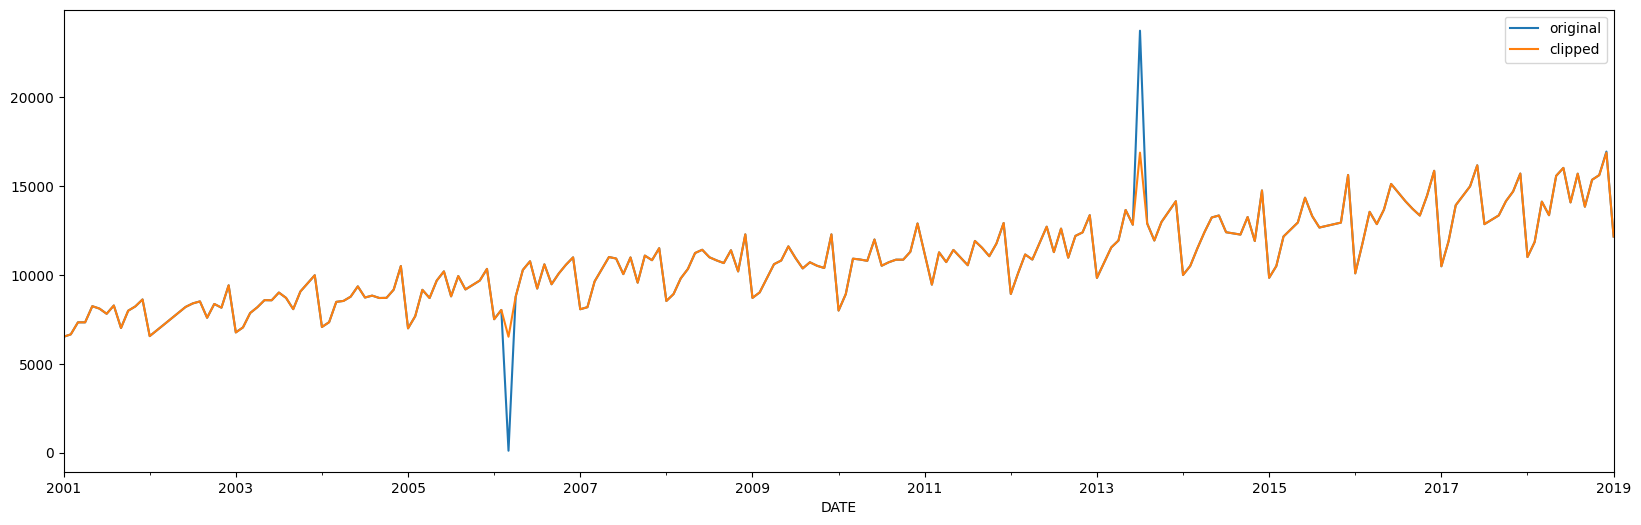

In [47]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.995), lower=mobile_sales.Sales.quantile(0.005)).plot(label="clipped")
plt.legend()

### Rolling Window Avg - OK

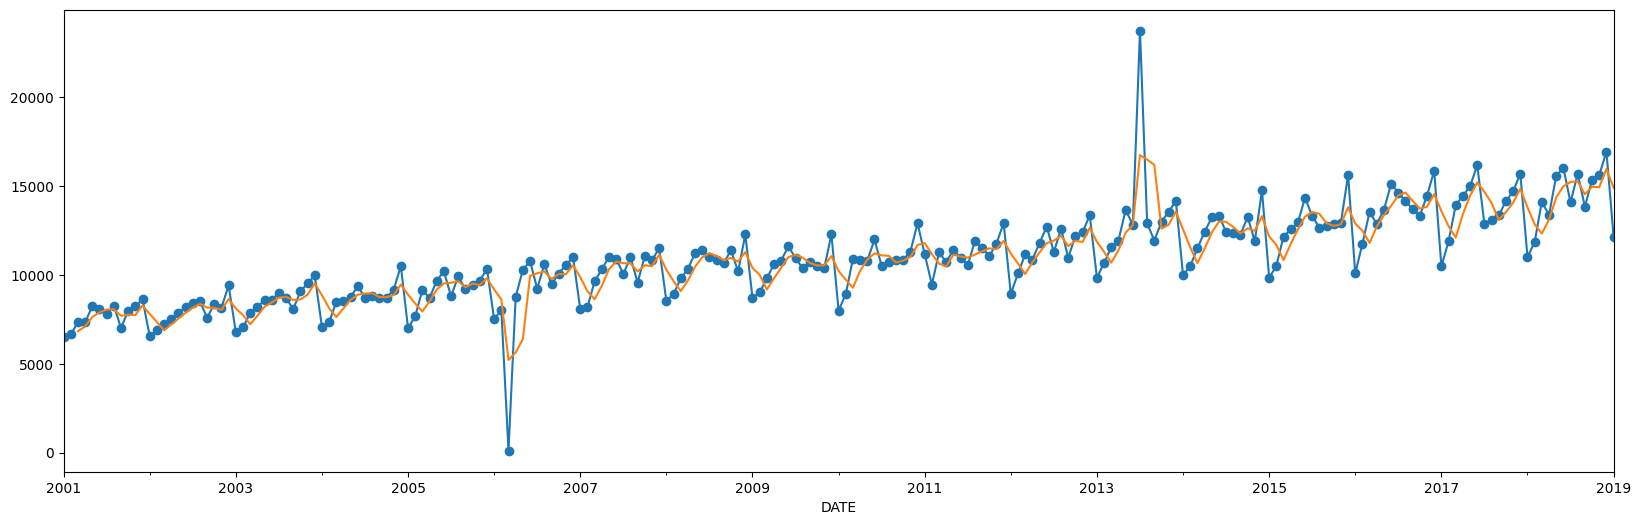

In [48]:
mobile_sales.Sales.plot(style="-o")
mobile_sales['Sales'].rolling(window=3, center = False).mean().plot();

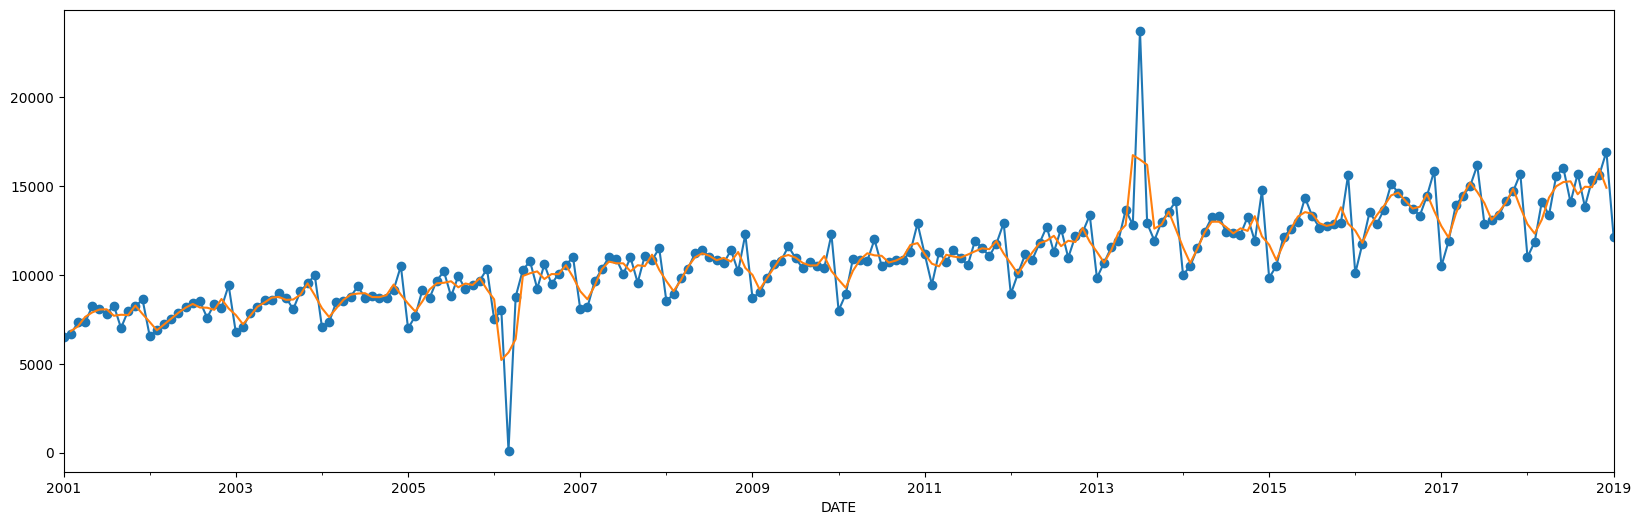

In [49]:
mobile_sales.Sales.plot(style="-o")
mobile_sales['Sales'].rolling(window=3, center = True).mean().plot();

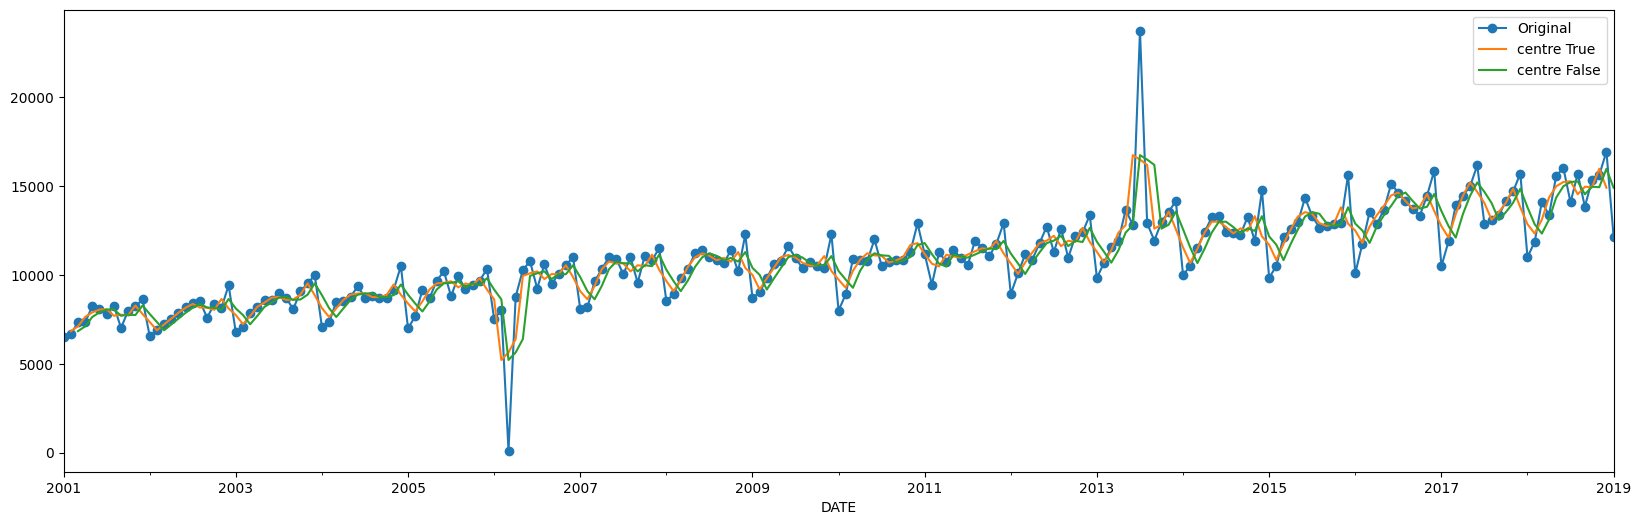

In [50]:
mobile_sales.Sales.plot(style="-o",label="Original")
mobile_sales['Sales'].rolling(window=3, center = True).mean().plot(label = "centre True")
mobile_sales['Sales'].rolling(window=3, center = False).mean().plot(label = "centre False")
plt.legend()

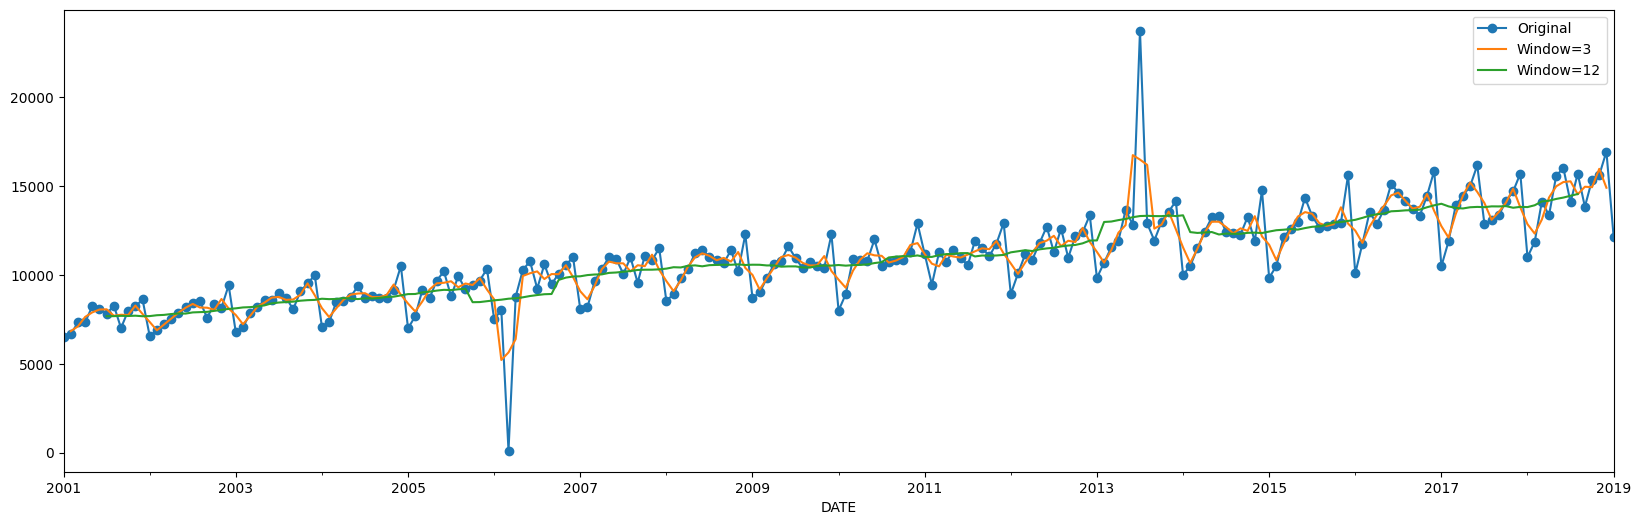

In [52]:
mobile_sales.Sales.plot(style="-o",label="Original")
mobile_sales['Sales'].rolling(window=3, center = True).mean().plot(label = "Window=3")
mobile_sales['Sales'].rolling(window=12, center = True).mean().plot(label = "Window=12")
plt.legend()